### Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.7 MB/s eta 0:00:00


## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [ ]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [ ]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## Mission 1) Compare the Population and Sample for TotalPrice
Extract a random sample of 1000 data points from the dataset and compare the mean and standard deviation of the 'TotalPrice' for the extracted sample and the entire dataset. Explain the differences between the population and the sample, and demonstrate how the Central Limit Theorem (CLT) applies in this context.

- You can use pandas' sample() method and explore pandas' descriptive statistics functions.
- Reference: Review the Central Limit Theorem in the slides.

In [ ]:
TotalPrice_mean = df["TotalPrice"].mean()
TotalPrice_std = df["TotalPrice"].std()

print("모집단 TotalPrice Avg:{}".format(TotalPrice_mean))
print("모집단 TotalPrice 표준편차:{}".format(TotalPrice_std))

모집단 TotalPrice 평균:17.98779487699964
모집단 TotalPrice 표준편차:378.8108235059747


In [ ]:
sample = df.sample(n=1000)

sample_mean = sample["TotalPrice"].mean()
sample_std = sample["TotalPrice"].std()

print("Population TotalPrice Avg:{}".format(TotalPrice_mean))
print("Population TotalPrice Std Dev:{}".format(TotalPrice_std))

표본 TotalPrice 평균:17.81061
표본 TotalPrice 표준편차:49.06683102294803


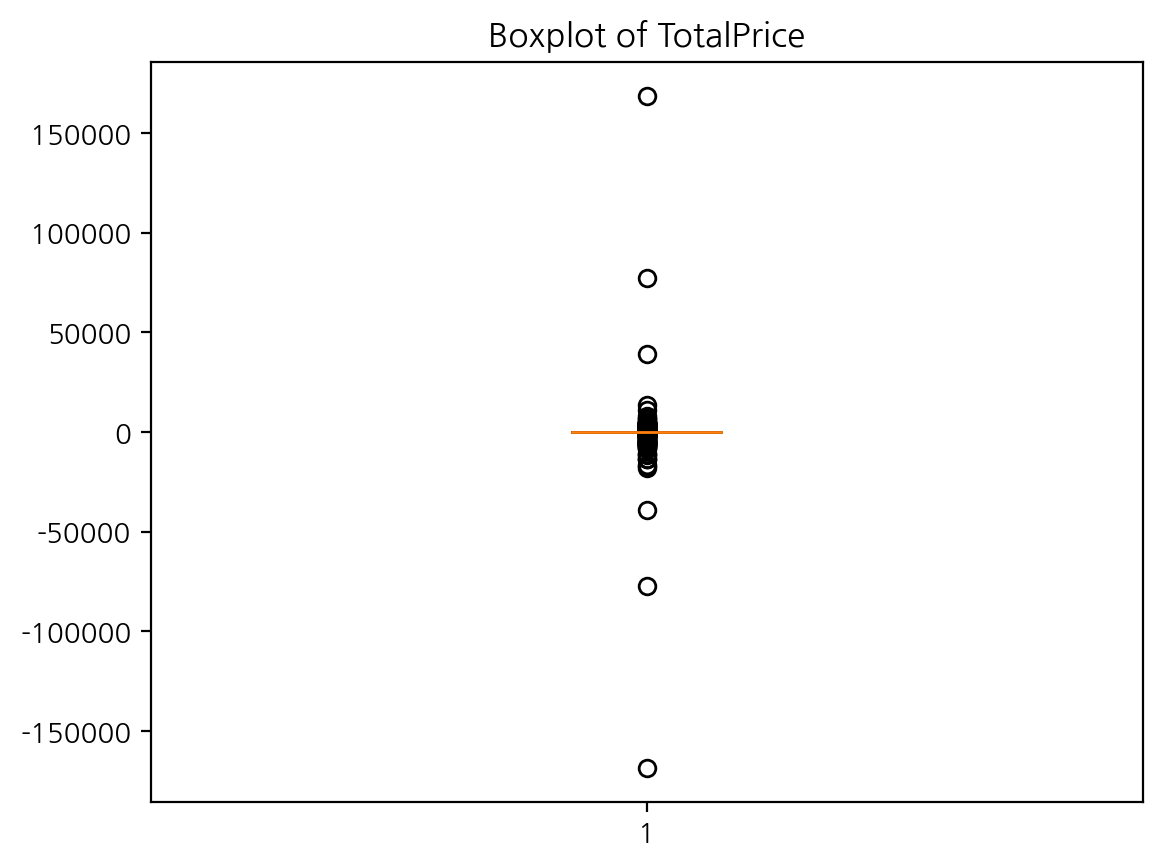

필터링된 모집단 TotalPrice의 평균: 14.889252967799166
필터링된 모집단 TotalPrice의 표준편차: 20.95762644356086


In [ ]:
plt.boxplot(df['TotalPrice'])
plt.title("Boxplot of TotalPrice")
plt.show()

q_low = df['TotalPrice'].quantile(0.01)
q_high = df['TotalPrice'].quantile(0.99)

filtered_df = df[(df['TotalPrice'] > q_low) & (df['TotalPrice'] < q_high)]

new_population_mean = filtered_df['TotalPrice'].mean()
new_population_std = filtered_df['TotalPrice'].std()

print("필터링된 모집단 TotalPrice의 평균:", new_population_mean)
print("필터링된 모집단 TotalPrice의 표준편차:", new_population_std)


In [ ]:
sample = df.sample(n=1000, random_state=1234)

population_mean = df['TotalPrice'].mean()
population_std = df['TotalPrice'].std()

sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std()

print("모집단의 평균:", population_mean)
print("모집단의 표준편차:", population_std)
print("표본의 평균:", sample_mean)
print("표본의 표준편차:", sample_std)


모집단의 평균: 17.98779487699964
모집단의 표준편차: 378.8108235059747
표본의 평균: 17.348599999999998
표본의 표준편차: 31.743778526116184


### Mission 1 Solution and Interpretation of Results

1. Difference Between Population and Sample

The means of the population and the sample are nearly identical, but the standard deviation of the sample is much smaller than that of the population. This is because the sample only represents a part of the population and thus doesn't capture the full variability of the entire population.

<br/>



2. Application of the Central Limit Theorem (CLT)
- The CLT states that the means of sufficiently large samples will follow a normal distribution, regardless of the population's distribution.
- To demonstrate this, we would need to randomly sample multiple times, calculate the sample mean for each, and observe the distribution of those sample means.
- In the example above, the sample size of 1000 is sufficiently large, so the sample mean is close to the population mean.  

<br/>



3. Conclusion

- The means of the population and the sample are almost identical, but there is a significant difference in their standard deviations.
- According to the CLT, when a sufficiently large sample is taken, the sample mean tends to approach the population mean.
<br/>

4. Additional Analysis - Boxplot Results

- By plotting a boxplot, we observed outliers in the population, which caused significant variation in the standard deviation. This highlights the impact of outliers in the population on the dispersion of the data.

### Demonstration of the Central Limit Theorem with Random Sampling

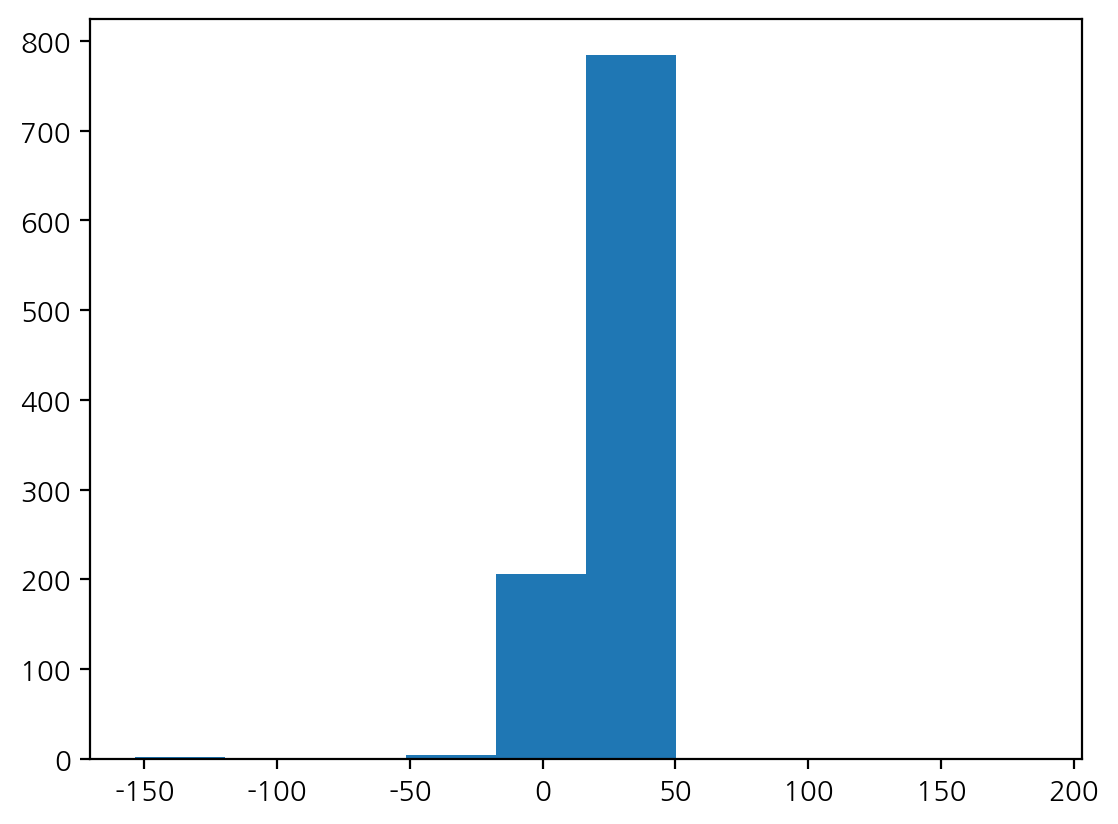

In [121]:
sample_means = []
n_samples = 1000  # 표본 추출 횟수
sample_size = 1000   # 각 표본의 크기

for _ in range(n_samples):
  sample = df["TotalPrice"].sample(n=sample_size, replace=True)
  sample_means.append(np.mean(sample))

plt.hist(sample_means);

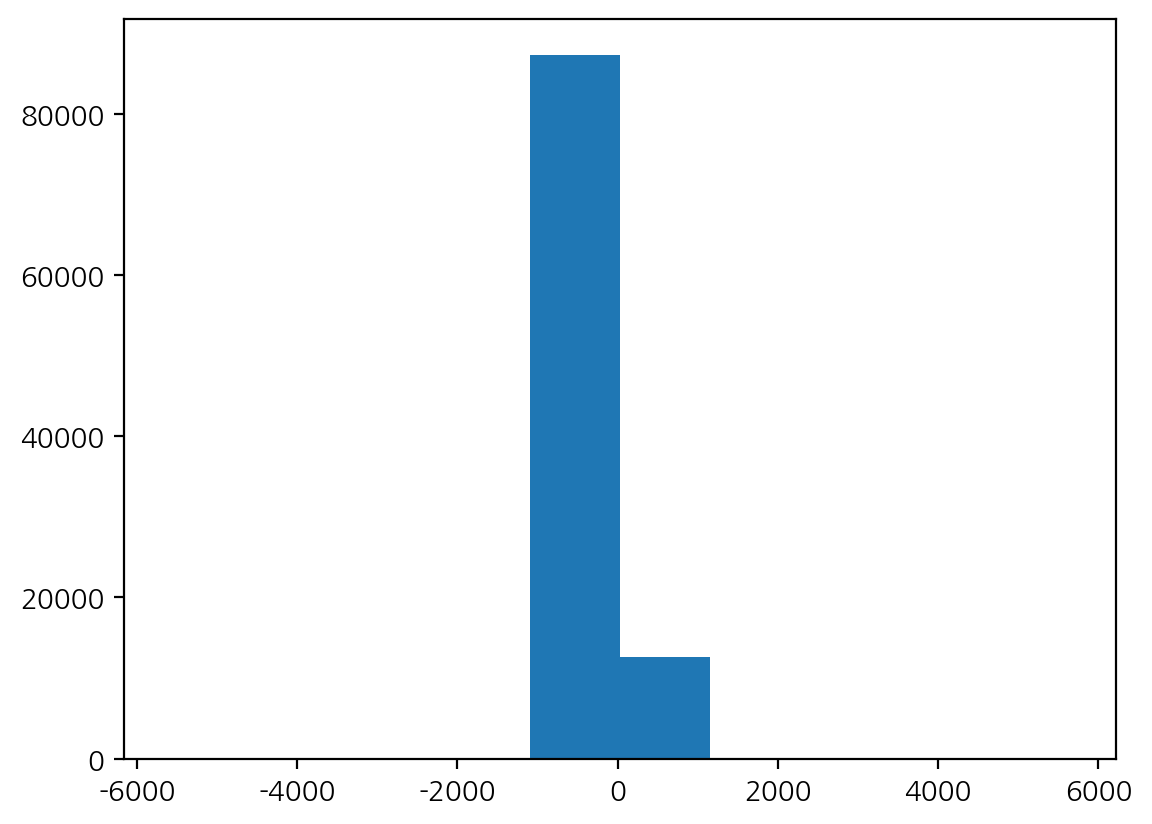

In [123]:
sample_means = []
n_samples = 100000  # 표본 추출 횟수
sample_size = 30   # 각 표본의 크기

for _ in range(n_samples):
  sample = df["TotalPrice"].sample(n=sample_size, replace=True)
  sample_means.append(np.mean(sample))

plt.hist(sample_means);

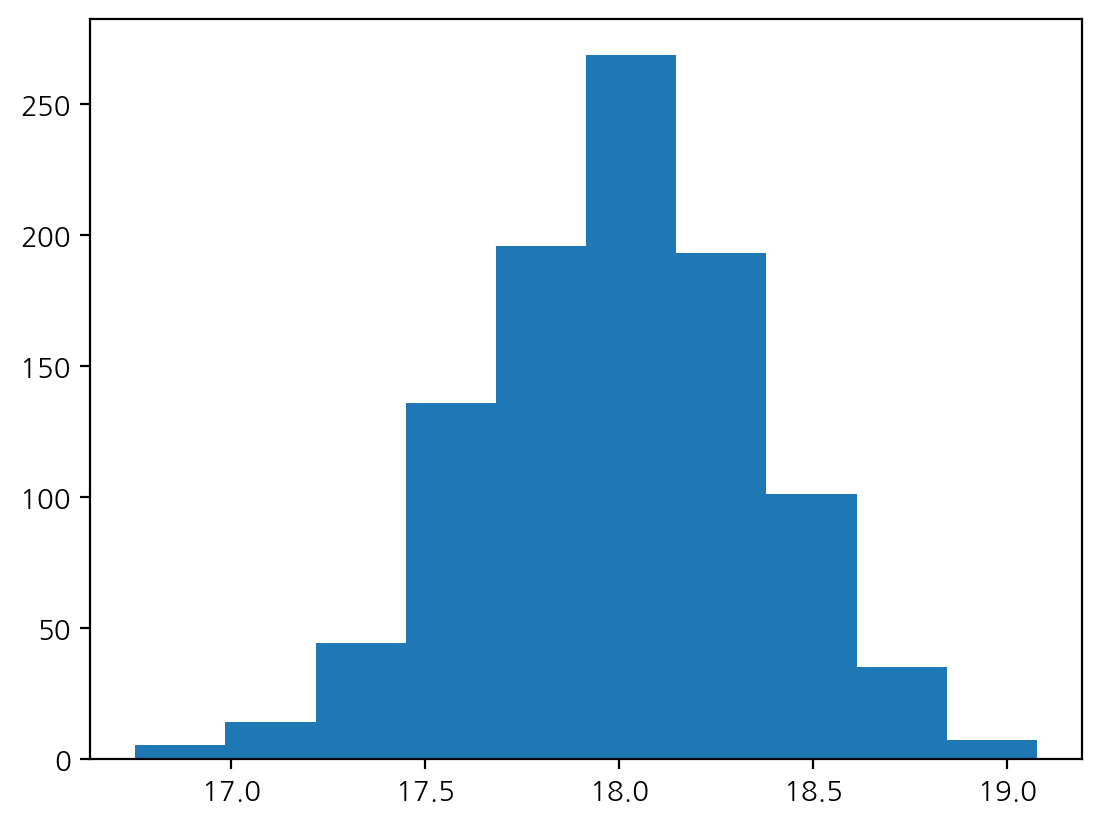

In [120]:
sample_means = []
n_samples = 1000  # Number of samples
sample_size = 1000000  # Size of each sample, larger than the data size
# Performing sampling with repetition, so the same graph can appear multiple times
# The actual data characteristics and distribution may not be well reflected

for _ in range(n_samples):
  sample = df["TotalPrice"].sample(n=sample_size, replace=True)
  sample_means.append(np.mean(sample))

plt.hist(sample_means);

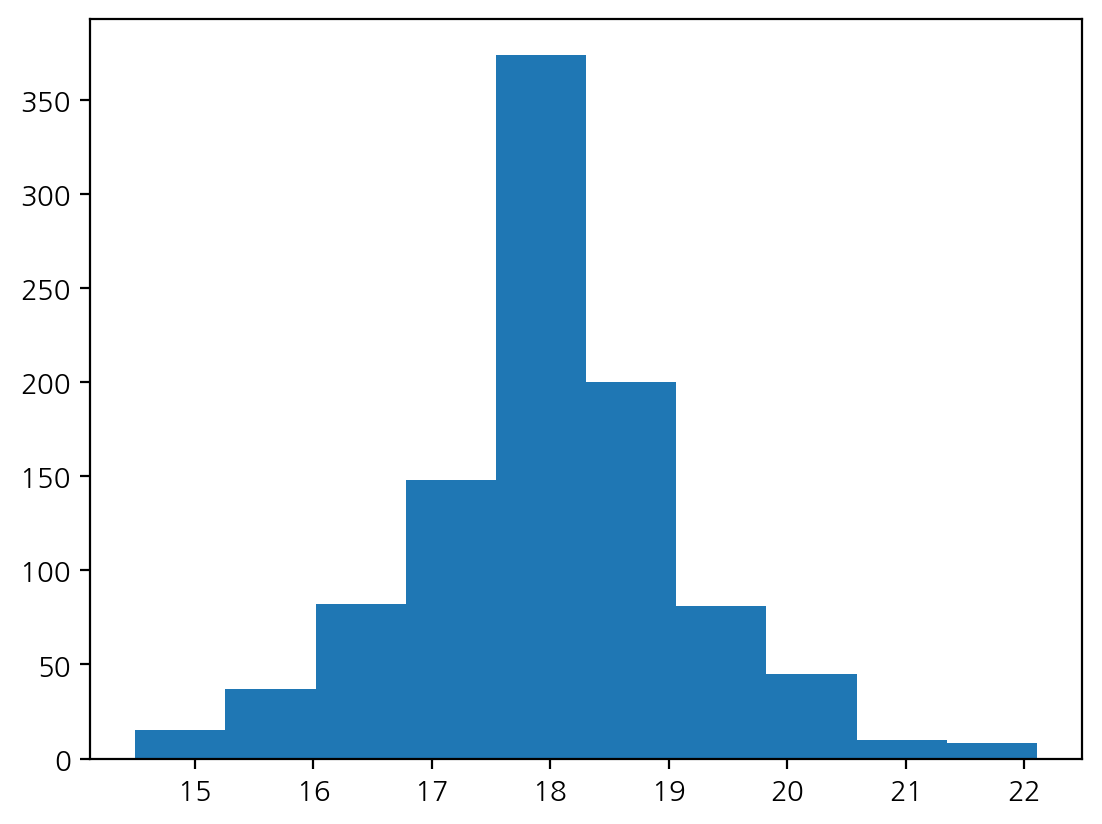

In [125]:
# 표본
sample_means = []
n_samples = 1000  # 표본 추출 횟수
sample_size = 100000

for _ in range(n_samples):
  sample = df["TotalPrice"].sample(n=sample_size, replace=True)
  sample_means.append(np.mean(sample))

plt.hist(sample_means);

By applying the Central Limit Theorem, the characteristics of a dataset that follows a non-normal distribution can be extracted.
- If the sample size is set to be very large, the sample will follow a normal distribution.
- As the sample size increases, the mean of each sample gets closer to the population mean, and the distribution of sample means tends to follow a normal distribution.
- However, in actual data analysis, since the amount of data is limited, it is important to choose an appropriate sample size.

In [124]:
df.shape

(541909, 11)

## Mission 2) 
Select the two countries with the highest frequency based on the 'Country' variable and test whether there is a difference in the 'TotalPrice' means for each country. Set up hypotheses and test them using an independent t-test, and explain Type I and Type II errors.

* Steps to complete the mission:
    <br>1) Load the data and find the 'TotalPrice' and 'Country' columns.
    <br>2) Identify the top two countries with the highest number of orders in the dataset.
    <br>3) Perform statistical testing.
    <br>4) Calculate the mean 'TotalPrice' for each country.
    <br>5) Use an independent t-test to check if there is a statistically significant difference in the 'TotalPrice' means between the two countries. You can use the ttest_ind function from the scipy.stats library and set equal_var=False to assume unequal variances.
    <br>6) Interpret the t-statistic and p-value, and explain the results. Explain the concepts of Type I and Type II errors and apply them to this dataset.

In [ ]:
# 1) Load Data & Find columns
from scipy import stats
df[['TotalPrice', 'Country']]

TotalPrice         Country
0            15.30  United Kingdom
1            20.34  United Kingdom
2            22.00  United Kingdom
3            20.34  United Kingdom
4            20.34  United Kingdom
...            ...             ...
541904       10.20          France
541905       12.60          France
541906       16.60          France
541907       16.60          France
541908       14.85          France

[541909 rows x 2 columns]

In [ ]:
df['Country']=='Unitied Kingdom'.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
# 2) Identify the top two countries with the highest number of orders in the dataset.

top_countries = df['Country'].value_counts().head(2).index.tolist()
print(top_countries)

['United Kingdom', 'Germany']


- the top two countries with the highest number of orders : United Kingdom(495478), Germany(9495)

In [ ]:
# Verify the difference in the average TotalPrice between countries.
df.groupby('Country')['TotalPrice'].mean()

Country
Australia               108.877895
Austria                  25.322494
Bahrain                  28.863158
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.499063
Cyprus                   20.813971
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     32.122599
European Community       21.176230
Finland                  32.124806
France                   23.069288
Germany                  23.348943
Greece                   32.263836
Hong Kong                35.128611
Iceland                  23.681319
Israel                   26.625657
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.059696
Norway                   32.378877
Poland                   21.152903
Portugal                 19.333127
RSA         

In [ ]:
# 3) Perform statistical verification
# 4) Calculate the average TotalPrice for the two countries
countries = ['United Kingdom', 'Germany']
mean_per_country = df.groupby('Country')['TotalPrice'].mean().loc[countries]
print(mean_per_country)

Country
United Kingdom    16.525065
Germany           23.348943
Name: TotalPrice, dtype: float64


In [ ]:
# 5) Perform independent samples t-test
from scipy.stats import ttest_ind


data_country1 = df[df['Country'] == top_countries[0]]['TotalPrice']
data_country2 = df[df['Country'] == top_countries[1]]['TotalPrice']

t_stat, p_value = ttest_ind(data_country1, data_country2, equal_var=False)

print(f"t-Statistic: {t_stat}, p-value: {p_value}")

# t-statistic & p-value
if p_value < 0.05:
    print("There is a statistically significant difference in the 'TotalPrice' averages between the two countries.")
else:
    print("There is no statistically significant difference in the 'TotalPrice' averages between the two countries.")


t-Statistic: -10.046360185819829, p-value: 9.823416115791871e-24
두 국가의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 있습니다.


6. Result Interpretation  
- Checking t-statistic and p-value  
  - p-value < 0.05 → We can interpret that there is a statistically significant difference in the 'TotalPrice' averages between the two countries.  
- Explanation of Type 1 and Type 2 Errors  
  - Type 1 Error: This error occurs when we incorrectly reject the null hypothesis even though it is true.  
    → In this dataset, a Type 1 Error would mean concluding that there is a difference in the 'TotalPrice' averages between the two countries when there is no actual difference.  
  - Type 2 Error: This error occurs when we incorrectly accept the null hypothesis even though the alternative hypothesis is true.  
    → In this dataset, a Type 2 Error would mean concluding that there is no difference in the 'TotalPrice' averages between the two countries when there actually is a difference.  

### Mission 2 Verification Result Interpretation  
- t-statistic: -10.04636  
- p-value: 9.823416115791871e-24 (very small)  
- Since the p-value is much smaller than 0.05, we can conclude that there is a statistically significant difference. We reject the null hypothesis and accept the alternative hypothesis. In other words, there is a statistically significant difference in the 'TotalPrice' averages between the two countries, the UK and Germany.  
  - Null Hypothesis: The 'TotalPrice' averages of the two countries are the same.  
  - Alternative Hypothesis: The 'TotalPrice' averages of the two countries are different.  

<br/>

- Explanation of Type 1 and Type 2 Errors  
  - Type 1 Error: In this case, a Type 1 Error would occur if we incorrectly conclude that there is a difference in the 'TotalPrice' averages between the two countries when there is no actual difference. Since the p-value is very low, the likelihood of a Type 1 Error occurring in this dataset is very low. However, since we are using a sample for estimation, there is always a possibility of some level of error.  
  - Type 2 Error: A Type 2 Error would occur if we incorrectly conclude that there is no difference in the 'TotalPrice' averages between the two countries when there is actually a difference. Given that the p-value is very low, the conclusion is that there is a difference, so a Type 2 Error did not occur in this case.  
    - Type 2 Errors can arise when the sample size is insufficient or the sample does not represent the population well, which may limit statistical testing.

## Mission 3) Statistical Analysis and Quartile Analysis for Weekdays and Weekends  

Use the following code to separate data into weekdays and weekends, then compute and visualize the statistics of the 'UnitPrice' distribution. You need to draw box plots and histograms, calculate the quartiles, central tendencies (mean, median), and variability (standard deviation, variance), and explain how these statistics describe the data distribution.

```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "Weekday"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "Weekend"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # Weekday
weekend_data = df[df['DayOfWeek'] > 4]   # Weekend
```

**Analysis Steps:**  
1. **Visualizations**  
   - Draw a box plot and histogram for both the weekday and weekend 'UnitPrice' distributions. These will help you visualize the data distribution and identify any outliers.

2. **Descriptive Statistics**  
   Use pandas' `describe()` method to calculate the quartiles, mean, median, standard deviation, and variance for both the weekday and weekend datasets.

3. **Interpretation**  
   Explain how the quartiles, mean, median, and standard deviation describe the distribution of 'UnitPrice' for both weekdays and weekends.

**References**  
- [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
- Look at the "Descriptive Statistics" section in the slides for further guidance.

In [ ]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요.

In [ ]:
print("주중 데이터 기술통계:")
print(weekday_data['UnitPrice'].describe().round(2))
variance = weekday_data['UnitPrice'].var()
print(variance.round(2))
print(weekday_data['UnitPrice'].median().round(2))

주중 데이터 기술통계:
count    477534.00
mean          4.84
std         103.03
min      -11062.06
25%           1.25
50%           2.10
75%           4.13
max       38970.00
Name: UnitPrice, dtype: float64
10615.6
2.1


In [ ]:
print("\n주말 데이터 기술통계:")
print(weekend_data['UnitPrice'].describe().round(2))
variance = weekend_data['UnitPrice'].var()
print(variance.round(2))


주말 데이터 기술통계:
count    64375.00
mean         2.89
std          7.96
min          0.00
25%          1.25
50%          1.85
75%          3.75
max       1236.75
Name: UnitPrice, dtype: float64
63.35
1.85


### Mission 3 Solution and Results Interpretation

1. **Descriptive Statistics**
   - **Weekday Data Statistics:**
     - Mean: 4.84, Median: 2.1, Standard Deviation: 103.03, Variance: 10615.6, Quartiles (25%: 1.25, 50%: 2.10, 75%: 4.13)
   - **Weekend Data Statistics:**
     - Mean: 2.89, Median: 1.85, Standard Deviation: 7.96, Variance: 63.35, Quartiles (25%: 1.25, 50%: 1.85, 75%: 3.75)

   → The standard deviation is large, and the mean and median are quite different, suggesting that there are a lot of outliers. We expect the histogram and box plot to show skewed or outlier-dominant shapes.

2. **Summary**
   - **Impact of Outliers:** 
     - The mean of 'UnitPrice' for weekdays (4.84) is higher than that for weekends (2.89), but this indicates the strong influence of outliers. The standard deviation for weekdays is 103.03, which is very high, suggesting that outliers are present. A histogram of this data will likely show that most values are close to zero.
   - **Difference Between Mean and Median:** 
     - The large gap between the mean (4.84) and median (2.1) for weekdays also reflects the influence of outliers. Since the median is much lower than the mean, it indicates that the data is skewed to the right.
   - **Variance and Standard Deviation:** 
     - The variance and standard deviation for weekdays are much higher than for weekends, showing that the weekday data is more spread out and exhibits more volatility compared to the weekend data.
   - **Quartiles:** 
     - The 75% quartile is relatively low, which means that most transactions took place at relatively low 'UnitPrice' values.

This analysis suggests that the weekday data is heavily influenced by a small number of very high 'UnitPrice' values (outliers), whereas the weekend data is more evenly distributed and less volatile.

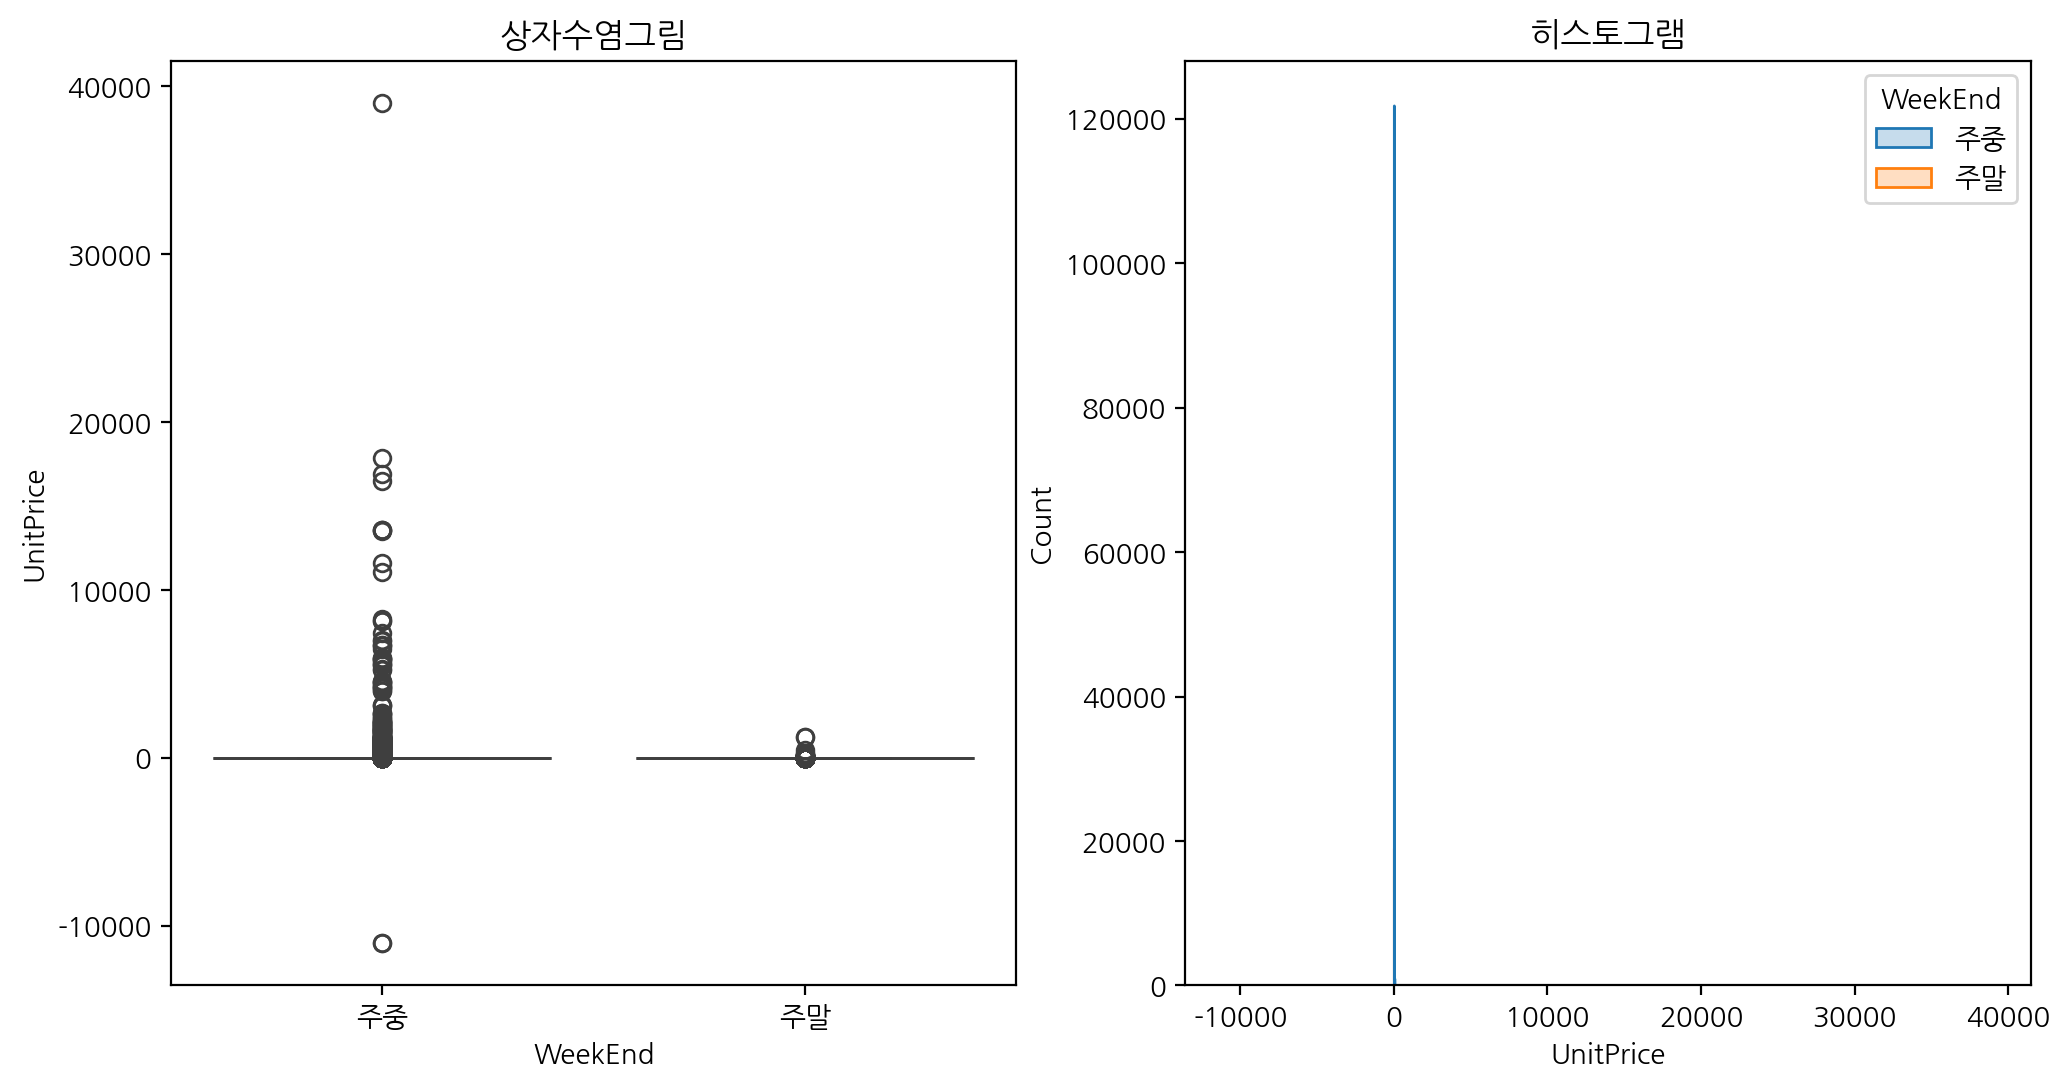

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="UnitPrice", hue="WeekEnd", element="step", binwidth=1)
plt.title('Histogram')
plt.show()

### Remove Outliers

In [128]:
weekday_data.shape

(477534, 11)

In [129]:
weekend_data.shape

(64375, 11)

In [133]:
count = (weekday_data['UnitPrice'] >= 800).sum()
print(count)

157


Text(0.5, 1.0, '상자수염그림')

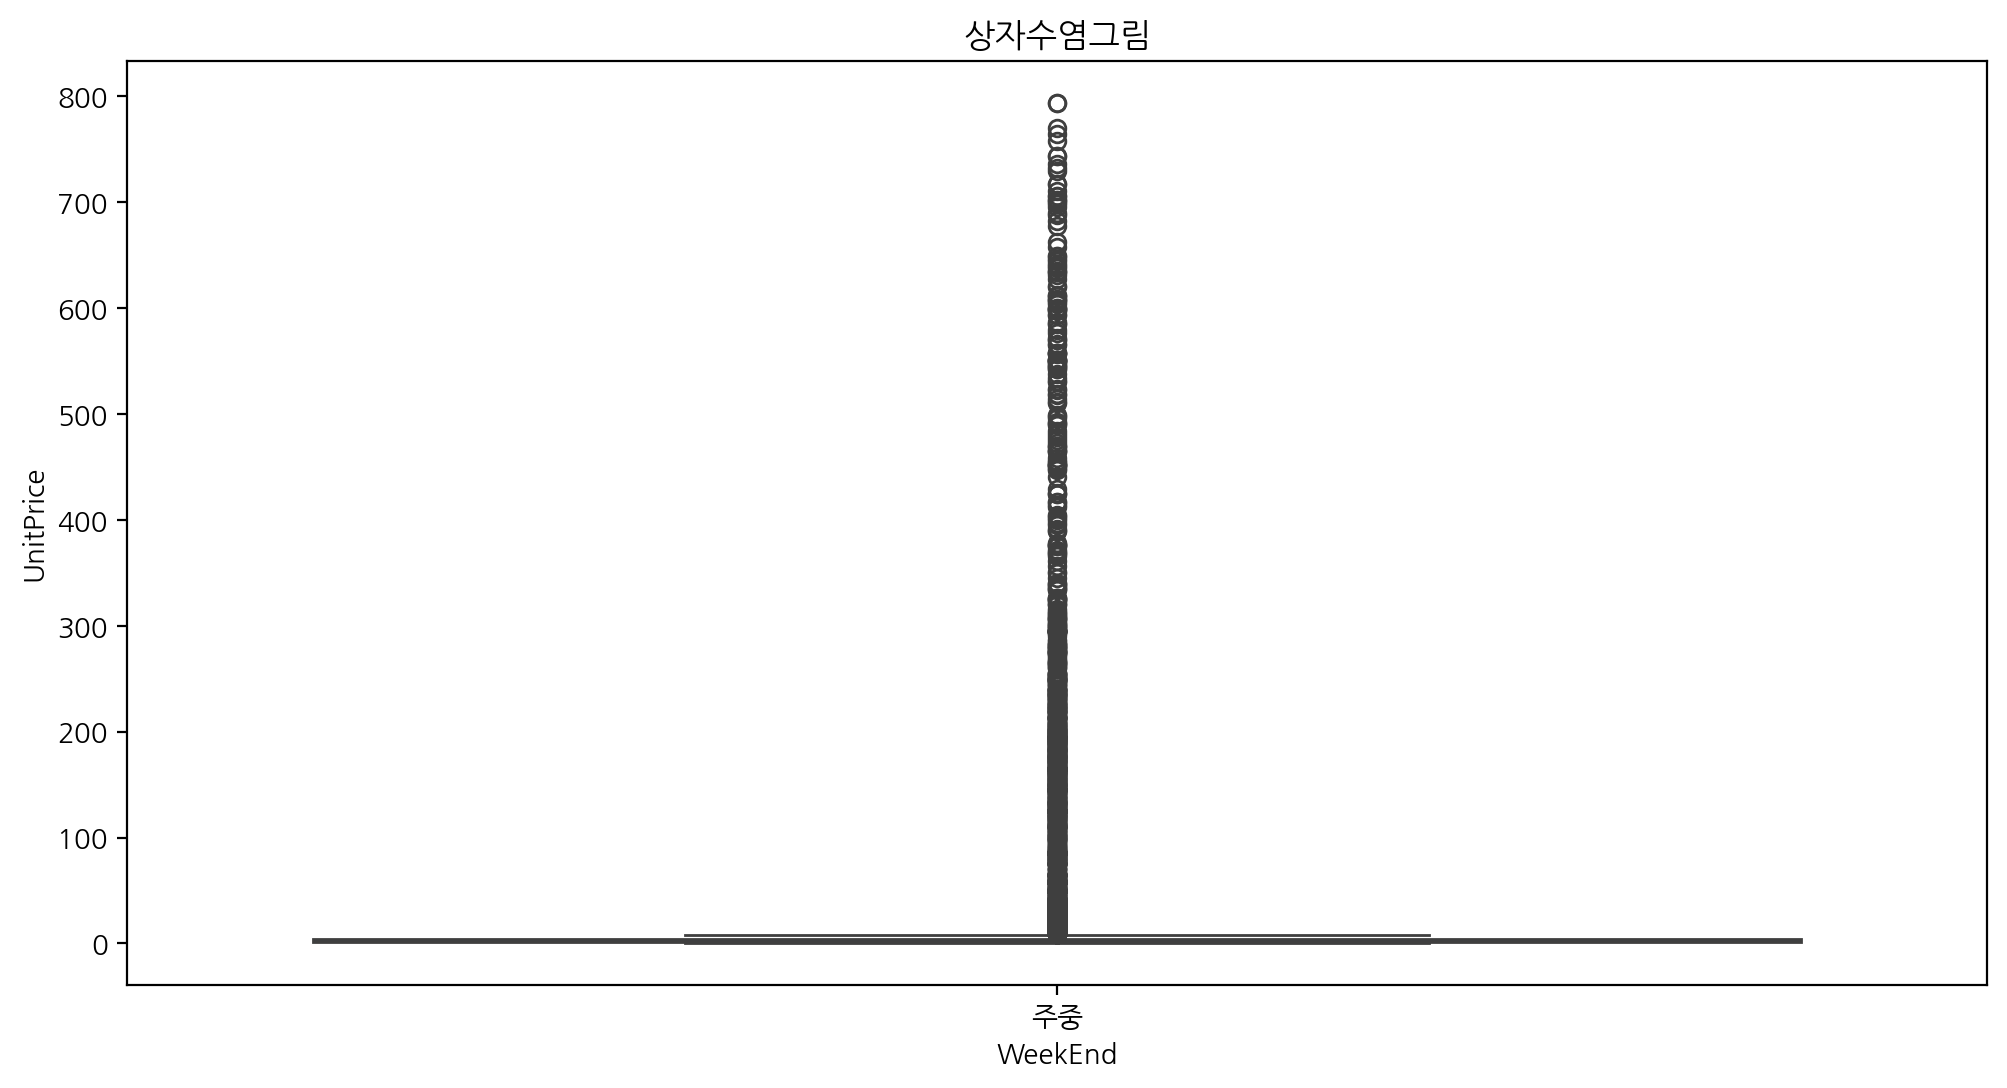

In [134]:
# 데이터 범위 조정
filtered_weekday = weekday_data[weekday_data['UnitPrice'] > 0]  # UnitPrice가 0보다 큰 데이터만 사용
filtered_weekday = filtered_weekday[filtered_weekday['UnitPrice'] < 800]

# 상자수염그림 및 히스토그램 그리기
plt.figure(figsize=(12, 6))

sns.boxplot(x='WeekEnd', y='UnitPrice', data=filtered_weekday)
plt.title('상자수염그림')


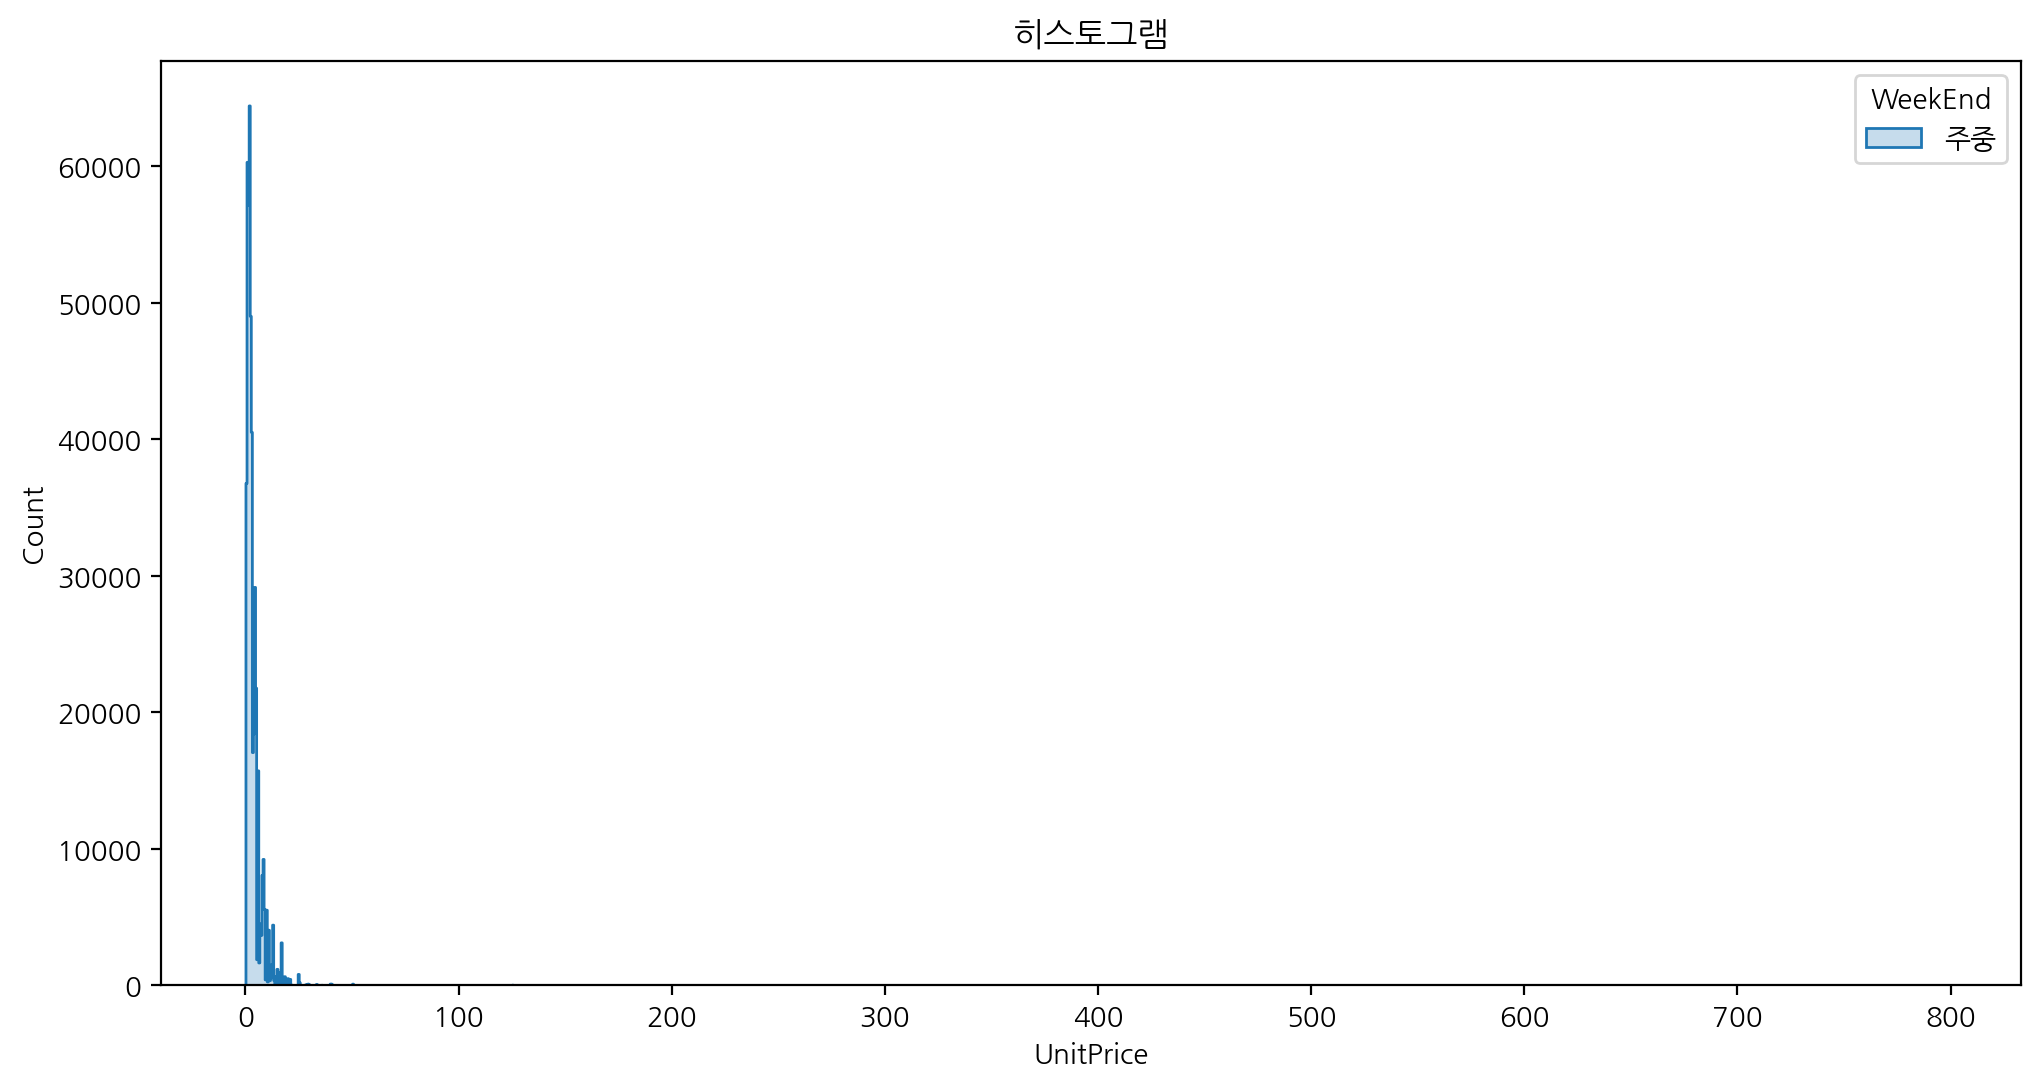

In [135]:
plt.figure(figsize=(12, 6))

sns.histplot(data=filtered_weekday, x="UnitPrice", hue="WeekEnd", element="step", binwidth=0.5)
plt.title('히스토그램')
plt.show()

In [137]:
count = (weekend_data['UnitPrice'] >= 50).sum()
print(count)

33


Text(0.5, 1.0, '상자수염그림')

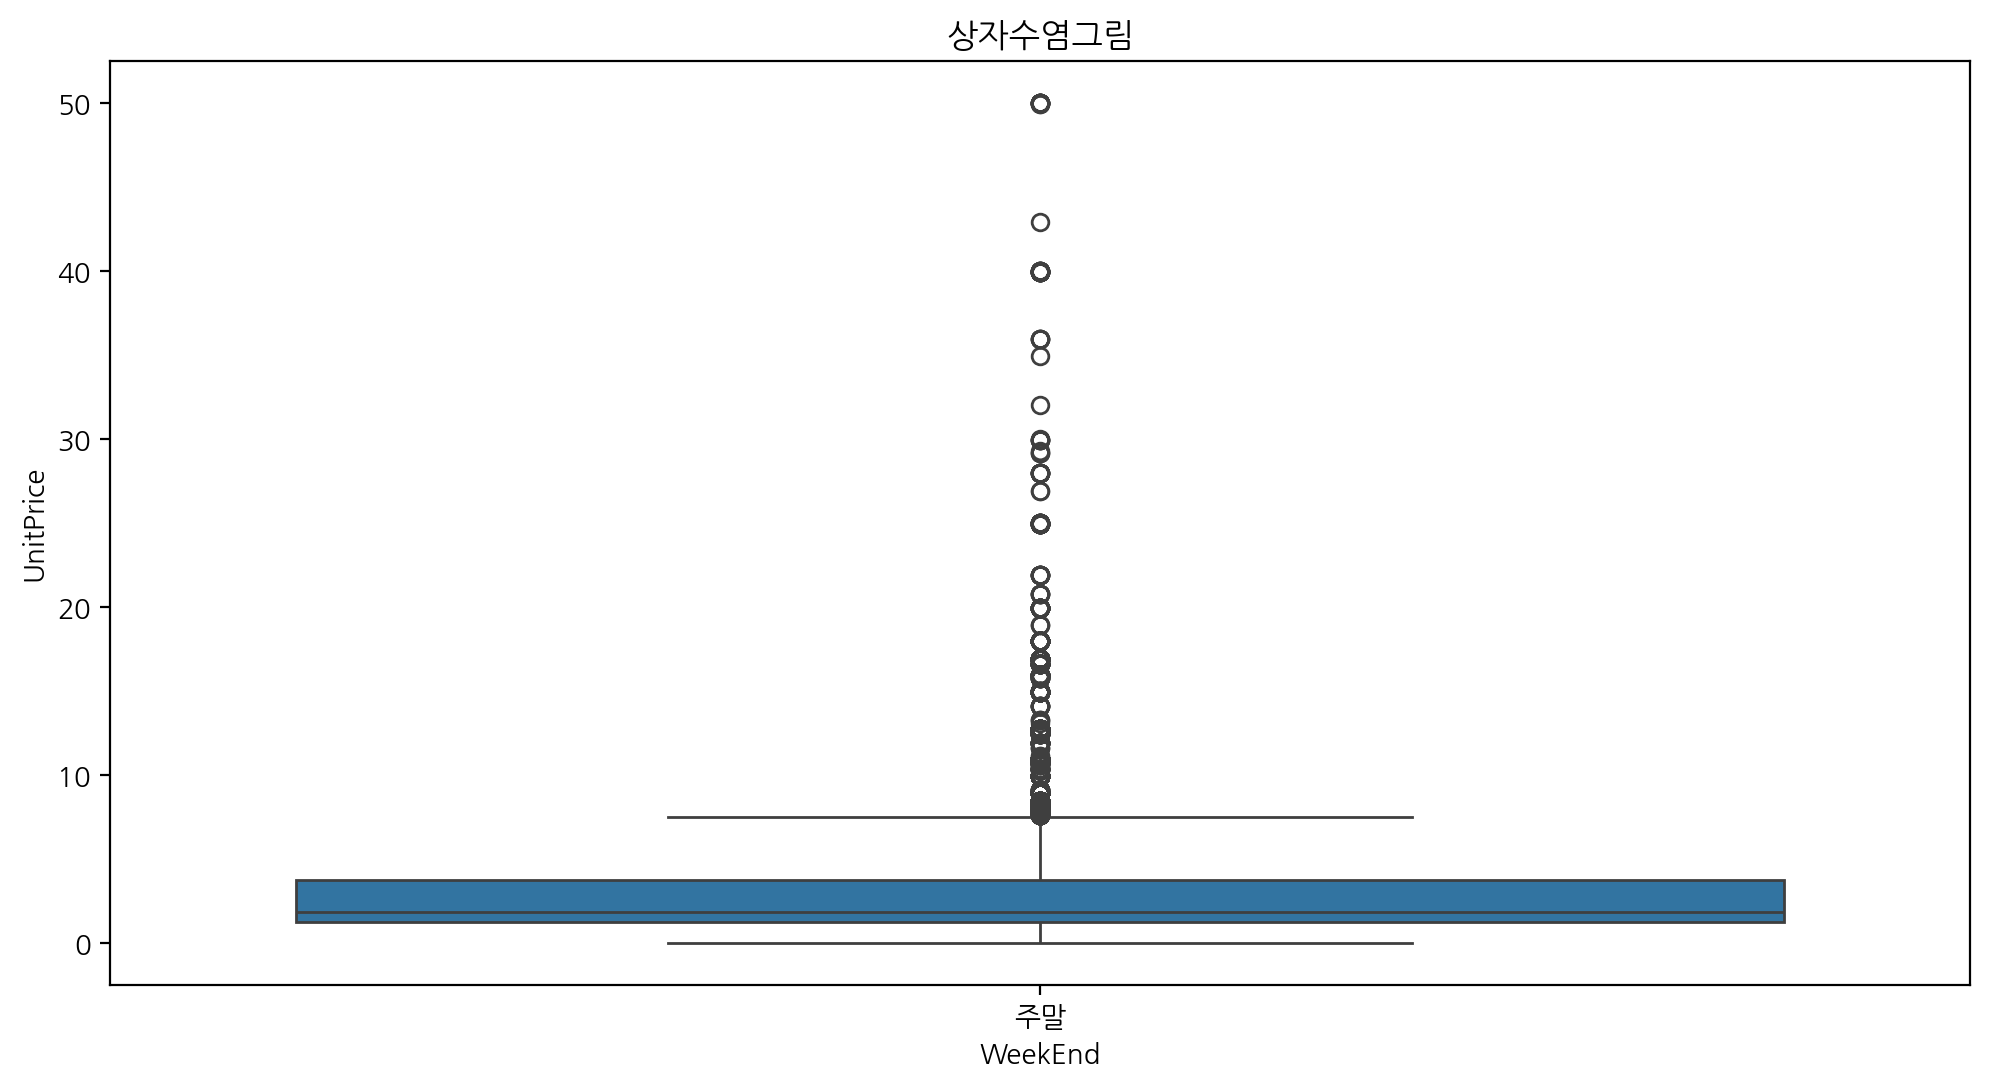

In [138]:
# 데이터 범위 조정
filtered_weekend = weekend_data[weekend_data['UnitPrice'] > 0]  # UnitPrice가 0보다 큰 데이터만 사용
filtered_weekend = filtered_weekend[filtered_weekend['UnitPrice'] <= 50]

# 상자수염그림 및 히스토그램 그리기
plt.figure(figsize=(12, 6))

sns.boxplot(x='WeekEnd', y='UnitPrice', data=filtered_weekend)
plt.title('상자수염그림')

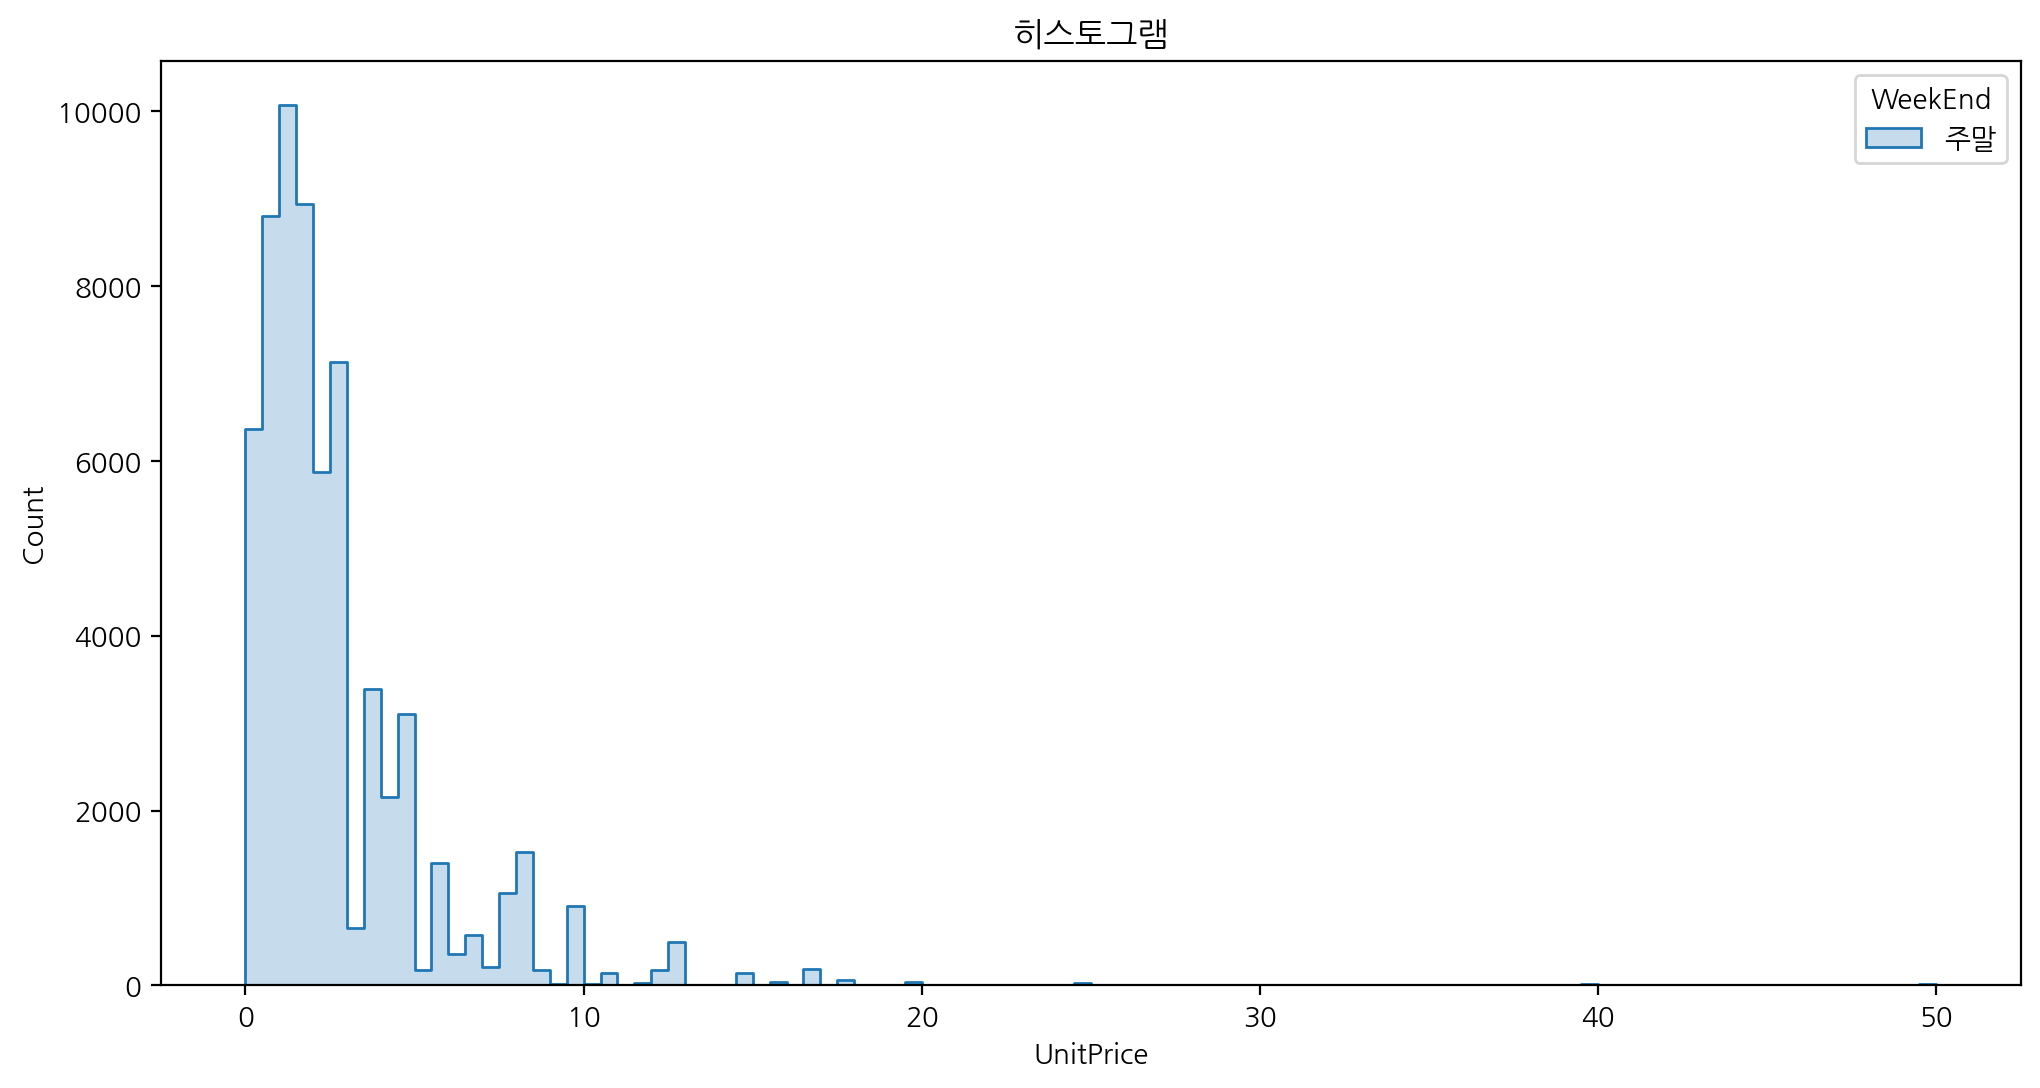

In [139]:
plt.figure(figsize=(12, 6))

sns.histplot(data=filtered_weekend, x="UnitPrice", hue="WeekEnd", element="step", binwidth=0.5)
plt.title('히스토그램')
plt.show()

- **477534 (Weekdays):** 0.033% (157), **64375 (Weekends):** 0.05% (33) removed from the plot 🔼
- The plot was extremely skewed to one side, so the values that were determined to be outliers were extracted.
- Even though these are only 100 data points out of 500,000, which is less than 0.02%, expanding the outlier range doesn't cause any significant issues.
- If it's confirmed that these values are not outliers and are indeed correct amounts, the group of customers with high expenditures could be identified and managed as VIP or VVIP clients.

In [127]:
100 / 550000 * 100

0.01818181818181818

### Mission 4) Verifying if the Median of 'TotalPrice' is Different from a Specific Value Using Nonparametric Test (e.g., Mann-Whitney U Test)

To verify if the median of the 'TotalPrice' is significantly different from a specific value, we will use a **Mann-Whitney U test**. This test is particularly useful when:

- The data does not follow a normal distribution, or we cannot assume normality.
- We are comparing the central tendency (median) of two independent samples.
- We are dealing with non-quantitative or ordinal data, or small sample sizes.

The test will help us verify if the median of 'TotalPrice' differs significantly from a specific value. We will perform the following steps:

### Steps:
1. **Create the 'TotalPrice' column** using the formula:
   ```python
   df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
   ```

2. **Set the specific value** to compare the median of 'TotalPrice' against. For instance, let’s assume we want to test if the median of 'TotalPrice' is significantly different from 100 (as an example).

3. **Apply the Mann-Whitney U test** to check if the observed median differs from the specified value. The null hypothesis (H₀) would be: "The median of 'TotalPrice' is equal to 100", and the alternative hypothesis (H₁) would be: "The median of 'TotalPrice' is not equal to 100."

4. **Interpret the results** in terms of the p-value. If the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that the median is different from the specified value.


In [ ]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
median_value = df['TotalPrice'].median()

group1 = df[df['TotalPrice'] <= median_value]['TotalPrice']
group2 = df[df['TotalPrice'] > median_value]['TotalPrice']

stat, p = mannwhitneyu(group1, group2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 없습니다.')
else:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.')

Statistics=0.000, p=0.000
두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.


In [ ]:
median_value = filtered_weekday['TotalPrice'].median()

group1 = filtered_weekday[filtered_weekday['TotalPrice'] <= median_value]['TotalPrice']
group2 = filtered_weekday[filtered_weekday['TotalPrice'] > median_value]['TotalPrice']

stat, p = mannwhitneyu(group1, group2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 없습니다.')
else:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.')

Statistics=0.000, p=0.000
두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.


In [ ]:
median_value = filtered_weekday['TotalPrice'].median()

group1 = filtered_weekend[filtered_weekend['TotalPrice'] <= median_value]['TotalPrice']
group2 = filtered_weekend[filtered_weekend['TotalPrice'] > median_value]['TotalPrice']

stat, p = mannwhitneyu(group1, group2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 없습니다.')
else:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.')

Statistics=0.000, p=0.000
두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.


### Mission 4 Verification Results and Business Perspective Analysis

- **Customer Segmentation**
  - This could suggest that customers are divided into two distinct groups.
  - Based on the data, we can differentiate between small spenders and large spenders, which implies the need for differentiated marketing strategies and customer service approaches.

- **Product and Pricing Strategy**
  - The purchasing behavior of customers who buy above and below the median might differ, so adjusting the product lineup or offering products at various price points could be a viable strategy.

- **Demand Forecasting and Inventory Management**
  - By understanding the differences in purchasing behaviors between the two groups, more accurate demand forecasting and efficient inventory management can be achieved.

- **Customized Promotions**
  - Customized promotions, discount policies, or events targeting VIPs or new customers could be implemented, considering the purchasing power and habits of the two groups.

## Mission 5: 
Calculate the 95% Confidence Interval for the UnitPrice Column and Visualize the Confidence Interval Using Seaborn

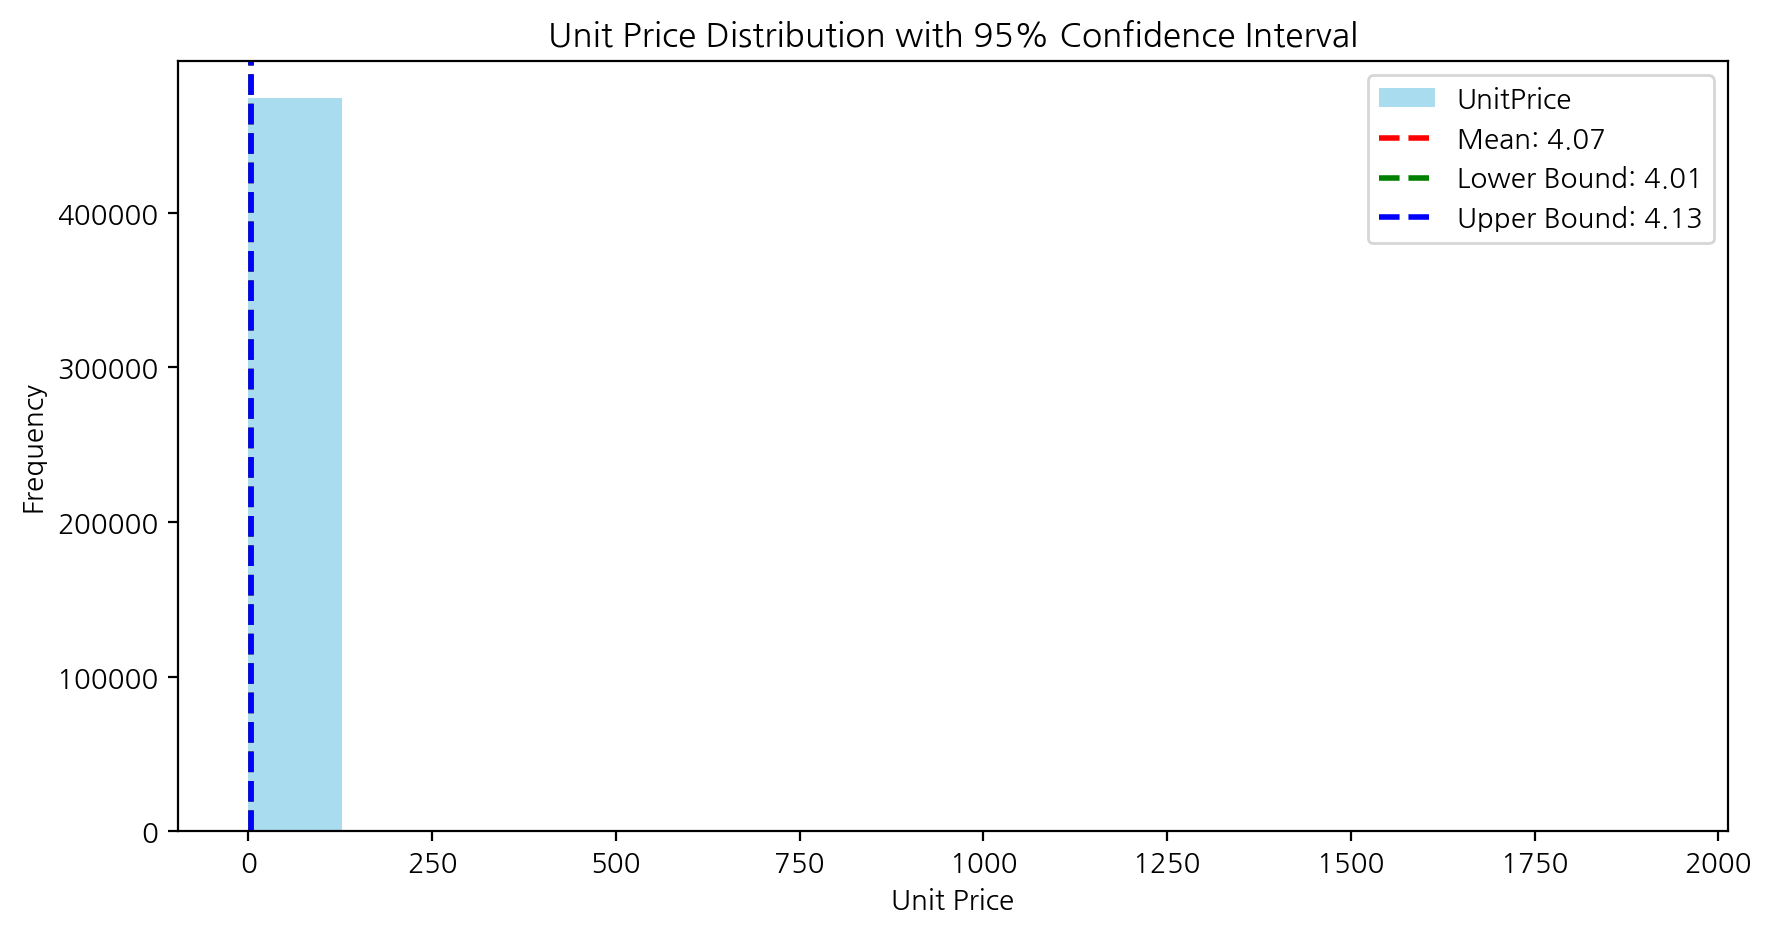

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 'UnitPrice'의 평균과 신뢰구간 계산
sample_mean = np.mean(filtered_weekday['UnitPrice'])
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=stats.sem(filtered_weekday['UnitPrice']))

# 히스토그램과 신뢰구간 시각화
plt.figure(figsize=(10, 5))
plt.hist(filtered_weekday['UnitPrice'], bins=15, color='skyblue', alpha=0.7, label='UnitPrice')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Unit Price Distribution with 95% Confidence Interval')
plt.legend()
plt.show()


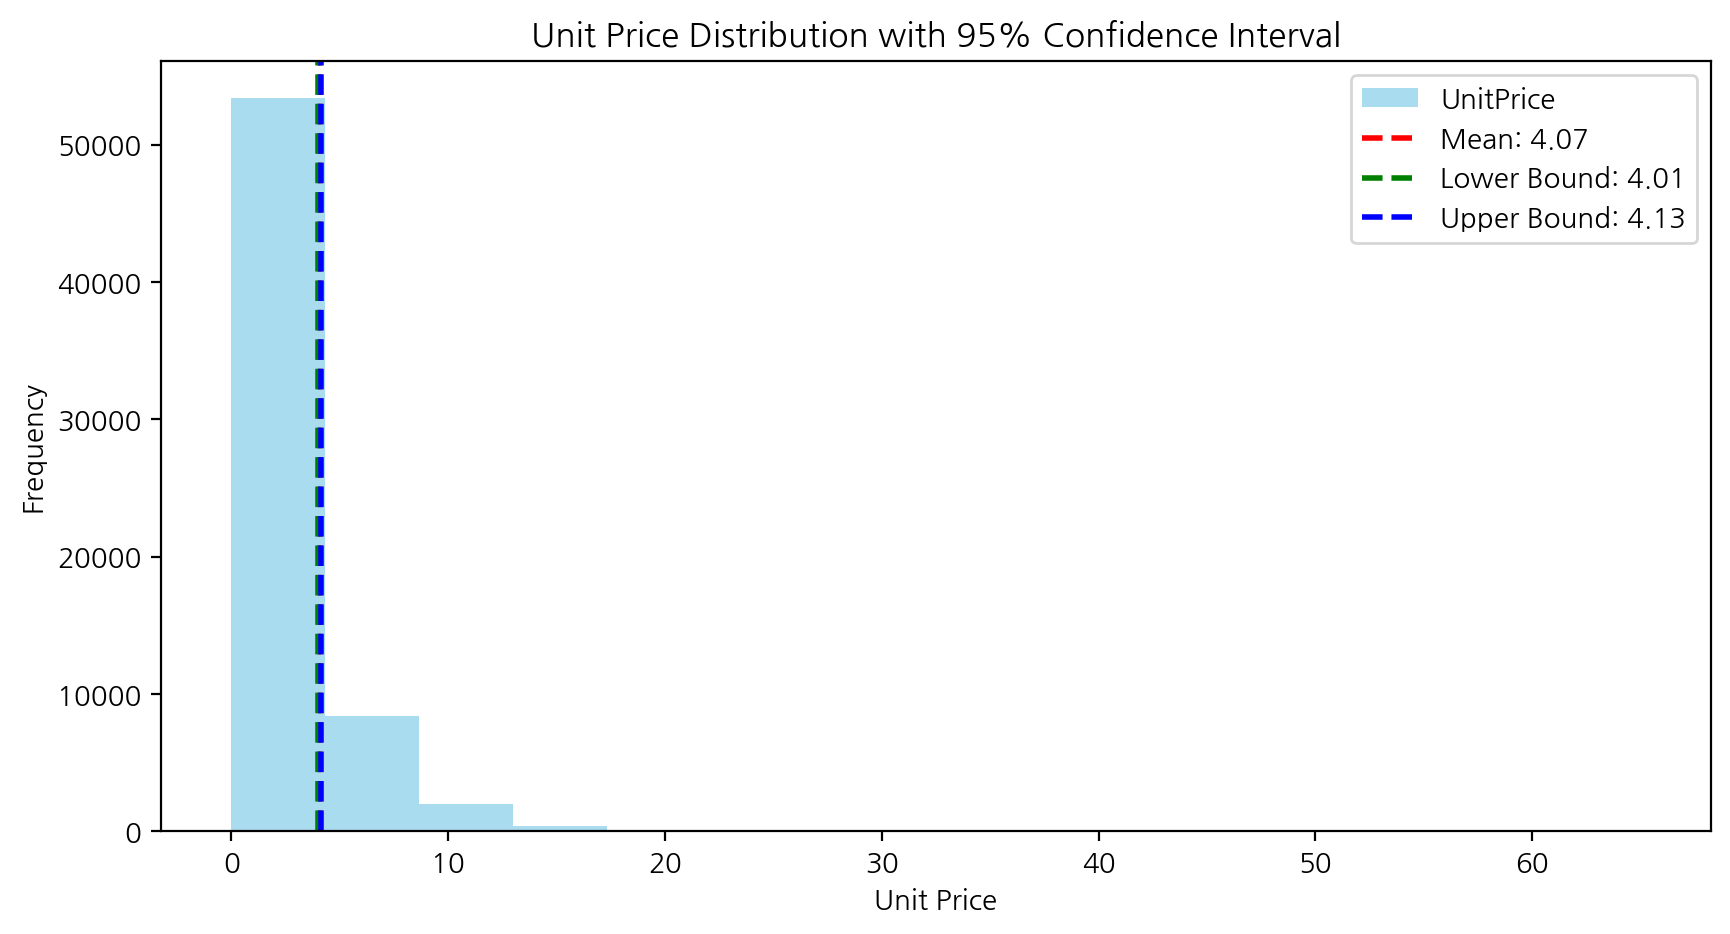

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 'UnitPrice'의 평균과 신뢰구간 계산
sample_mean = np.mean(filtered_weekday['UnitPrice'])
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=stats.sem(filtered_weekday['UnitPrice']))

# 히스토그램과 신뢰구간 시각화
plt.figure(figsize=(10, 5))
plt.hist(filtered_weekend['UnitPrice'], bins=15, color='skyblue', alpha=0.7, label='UnitPrice')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Unit Price Distribution with 95% Confidence Interval')
plt.legend()
plt.show()


### 미션5 - seaborn으로 신뢰구간 시각화

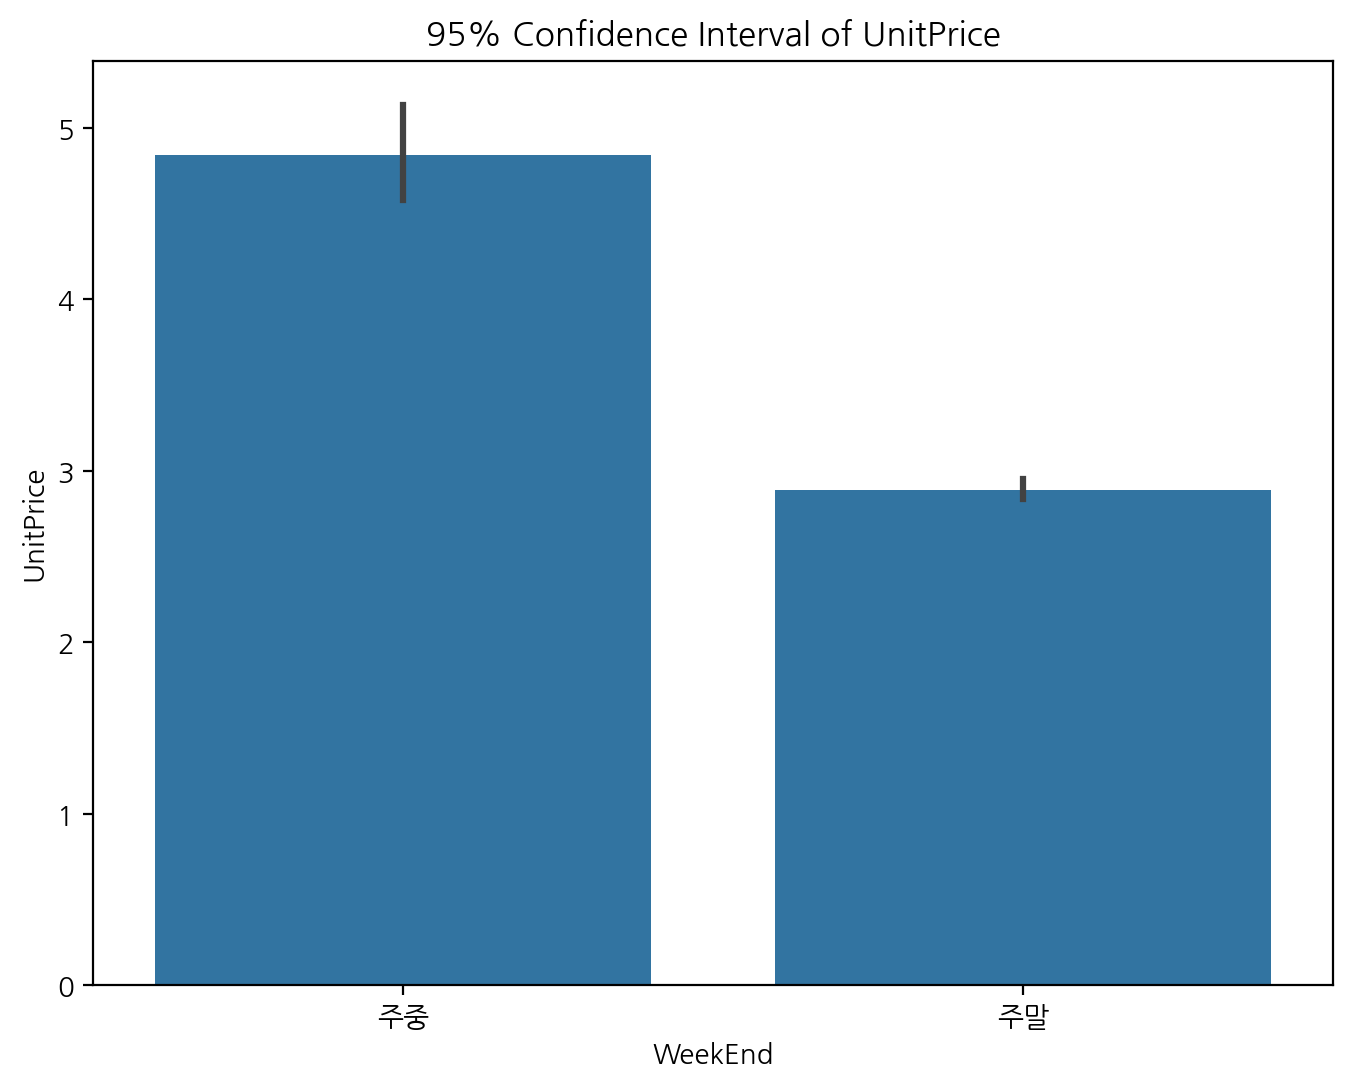

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn으로 신뢰구간 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='WeekEnd', y='UnitPrice', data=df, errorbar=('ci', 95))
plt.title('95% Confidence Interval of UnitPrice')
plt.show()


### Graph Interpretation
The above graph shows the 95% confidence intervals for the average `UnitPrice` during weekdays and weekends.

- **Weekday data confidence interval (approx. 80 ~ 120)**: This suggests that the average `UnitPrice` during weekdays is expected to be between 80 and 120.
- **Weekend data confidence interval (approx. 100 ~ 140)**: This suggests that the average `UnitPrice` during weekends is expected to be between 100 and 140.

---

### Insights

- Both weekday and weekend average `UnitPrice` values are above 100, with the weekend slightly higher. This indicates that more expensive products are typically sold during weekends.
- The confidence interval for the weekend data is slightly wider than the weekday data. This suggests that the variance of `UnitPrice` is higher during the weekend, meaning there is a greater possibility of selling higher-priced items on weekends.

---

### Additional Analysis

- By analyzing the distribution of `UnitPrice` data for weekdays and weekends in more detail, we can confirm that more expensive products are sold during weekends.
- By analyzing the types of products sold on weekends, the following marketing strategies can be considered:

1️⃣ **Offer weekend discounts to attract weekday customers to weekends**  
2️⃣ **Focus on promoting high-priced items during weekends**  
3️⃣ **Provide special benefits for customers purchasing high-priced items on weekends**  
   - (Weekend-only benefits, time-limited sales, etc.)

### Mission 5 Business Applications

1️⃣ **Pricing Strategy**: By understanding the confidence intervals of UnitPrice, we can assess the current market position of prices. This is useful when adjusting prices or creating new pricing strategies.

2️⃣ **Inventory Management**: Recognizing the price range where products are most frequently sold allows for better inventory planning. Products in that price range can be stocked more, or pricing strategies can be adjusted to optimize profits.

3️⃣ **Marketing Strategy**: Utilizing confidence interval data for different price ranges enables targeted marketing. Promotions can be planned around the most commonly sold price ranges to maximize customer engagement.

4️⃣ **Market Analysis**: The confidence interval helps understand price volatility within the market, allowing for a competitive analysis of pricing against competitors.

### Reflection

1. **Overview**
   - Real-world data often contains many values that appear to be outliers, as seen with today's dataset.
   - This provided an environment where I could try interpreting the data from various angles and explore different perspectives.

2. **Key Takeaways**
   - **Importance of Data Exploration and Outlier Handling**
     - I got a sense of how much outliers can impact statistical analysis results.
     - However, if this were real business data, we likely couldn't just delete outliers without considering the context.
     - It might be necessary to revisit the data collection process and identify where issues occurred. If it's a data issue, we should work on improving and correcting the collection process. If it's legitimate data, then managing the customer segment carefully (e.g., identifying VIPs) is crucial.

   - **Understanding and Applying Confidence Intervals**
     - Although I had heard the term "confidence interval" often and thought I was familiar with it, it was challenging to reframe it from a business perspective.
     - Understanding the variability of data around the mean helps in managing uncertainty in business decisions.

   - **Understanding the Central Limit Theorem**
     - I experimented with adjusting the sample size and number of samples to test the Central Limit Theorem.
     - It was helpful in strengthening my understanding of this concept